In [57]:
import pandas as pd

In [58]:
kaggle_metadata = pd.read_csv('movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('ratings.csv')

In [35]:
kaggle_metadata

,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.95,...,1995-10-30,"373,554,033.00",81.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.70,"5,415.00"
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.02,...,1995-12-15,"262,797,249.00",104.00,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.90,"2,413.00"
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.71,...,1995-12-22,0.00,101.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.50,92.00
3,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.86,...,1995-12-22,"81,452,156.00",127.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.10,34.00
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.39,...,1995-02-10,"76,578,911.00",106.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.70,173.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.07,...,NaT,0.00,90.00,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.00,1.00
45462,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.18,...,2011-11-17,0.00,360.00,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.00,3.00
45463,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.90,...,2003-08-01,0.00,90.00,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.80,6.00
45464,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.00,...,1917-10-21,0.00,87.00,[],Released,NaN,Satan Triumphant,False,0.00,0.00


In [36]:
ratings

,userId,movieId,rating,timestamp
0,1,110,1.00,1425941529
1,1,147,4.50,1425942435
2,1,858,5.00,1425941523
3,1,1221,5.00,1425941546
4,1,1246,5.00,1425941556
...,...,...,...,...
26024284,270896,58559,5.00,1257031564
26024285,270896,60069,5.00,1257032032
26024286,270896,63082,4.50,1257031764
26024287,270896,64957,4.50,1257033990


In [37]:
ratings.sample(n=5) 
#throws random data from table

,userId,movieId,rating,timestamp
24567200,255358,5879,1.50,1185061492
8908279,91899,588,3.50,1111530046
10751509,111002,2959,5.00,1138658240
19079089,198194,912,3.50,1370721927
6896344,71144,3088,3.50,1222527894


In [38]:
kaggle_metadata.dtypes

belongs_to_collection            object
budget                            int64
genres                           object
homepage                         object
id                                int64
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                              bool
vote_average                    float64
vote_count                      float64
dtype: object

In [39]:
kaggle_metadata['adult'].value_counts()


KeyError: 'adult'

In [40]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]


KeyError: 'adult'

In [41]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')


KeyError: 'adult'

In [42]:
kaggle_metadata['video'].value_counts()


False    45454
Name: video, dtype: int64

In [43]:
kaggle_metadata['video'] == 'True'


0        False
1        False
2        False
3        False
4        False
         ...  
45461    False
45462    False
45463    False
45464    False
45465    False
Name: video, Length: 45454, dtype: bool

In [44]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'


In [45]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [46]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])


In [47]:
ratings.info(null_counts=True)

/var/folders/yz/cb5vzkt14_b8w5qbjt71pdl80000gn/T/ipykernel_33696/3356424145.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  ratings.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [48]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

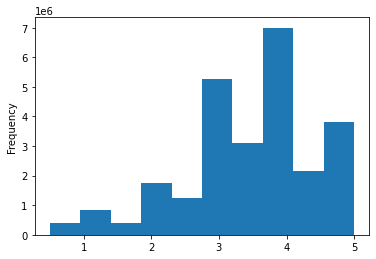

In [49]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()


In [56]:
import json


file_dir = 'C://Users/morriscomia/Desktop/class/Movies-ETL/'
f'{file_dir}filename'
with open('wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)


wiki_movies_df = pd.DataFrame(wiki_movies_raw)

movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])


KeyError: 'imdb_id'